### Solution By: Suraj Ekka
Last updated September 18, 2020
___
### Project - Thera Bank Personal Loan Campaign
___
### Context:
This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

### Objective:
Goal is to predict the likelihood of a liability customer's acceptance of personal loans.

____
#### Github Link:
---Link----

#### Import Library, Load Data & Basic Checks

In [1]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')

#modeling package
from sklearn.model_selection import train_test_split
from scipy import stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Insights:
        1. ID is unique key which needs to be drop
        2. Need to review Experience as minimun is -3 which doesn't seems normal
        3. Min CCAvg is 0 which seems okay
        4. In Mortgage, Personal Loan, Securities Account, CD Account, Online & CreditCard we observe 0 which seems normal

In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.isnull().values.any()

False

#### Exploratory Data Analysis

###### NUMBER OF UNIQUE IN EACH COLUMN

In [8]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

###### Number of people with zero Mortgages
___

In [9]:
df['Mortgage'].isin([0]).sum()

3462

###### Total 3,462 customers have zero Mortgage

###### Number of people with zero credit card spending per month
___

In [10]:
df['CCAvg'].isin([0]).sum()

106

#### A total of 106 people have zero credit card spending per month

###### Value Count of All Categorical Columns
___

In [11]:
df['Family'].value_counts(True)

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

In [12]:
df['Online'].value_counts(True)

1    0.5968
0    0.4032
Name: Online, dtype: float64

In [13]:
df['CreditCard'].value_counts(True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

In [14]:
df['Securities Account'].value_counts(True)

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [15]:
df['Education'].value_counts(True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [16]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
df['CD Account'].value_counts(True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

### Univariate and Bivariate Analysis
____

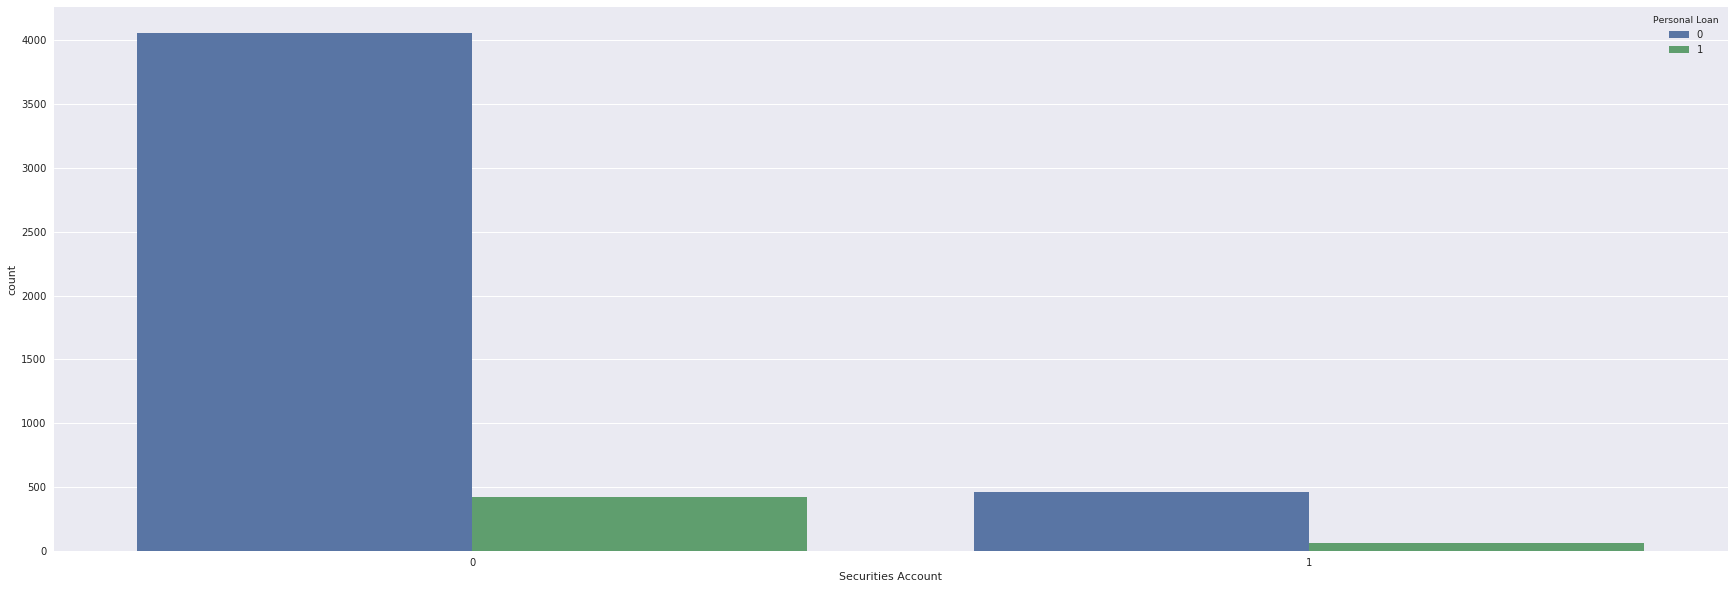

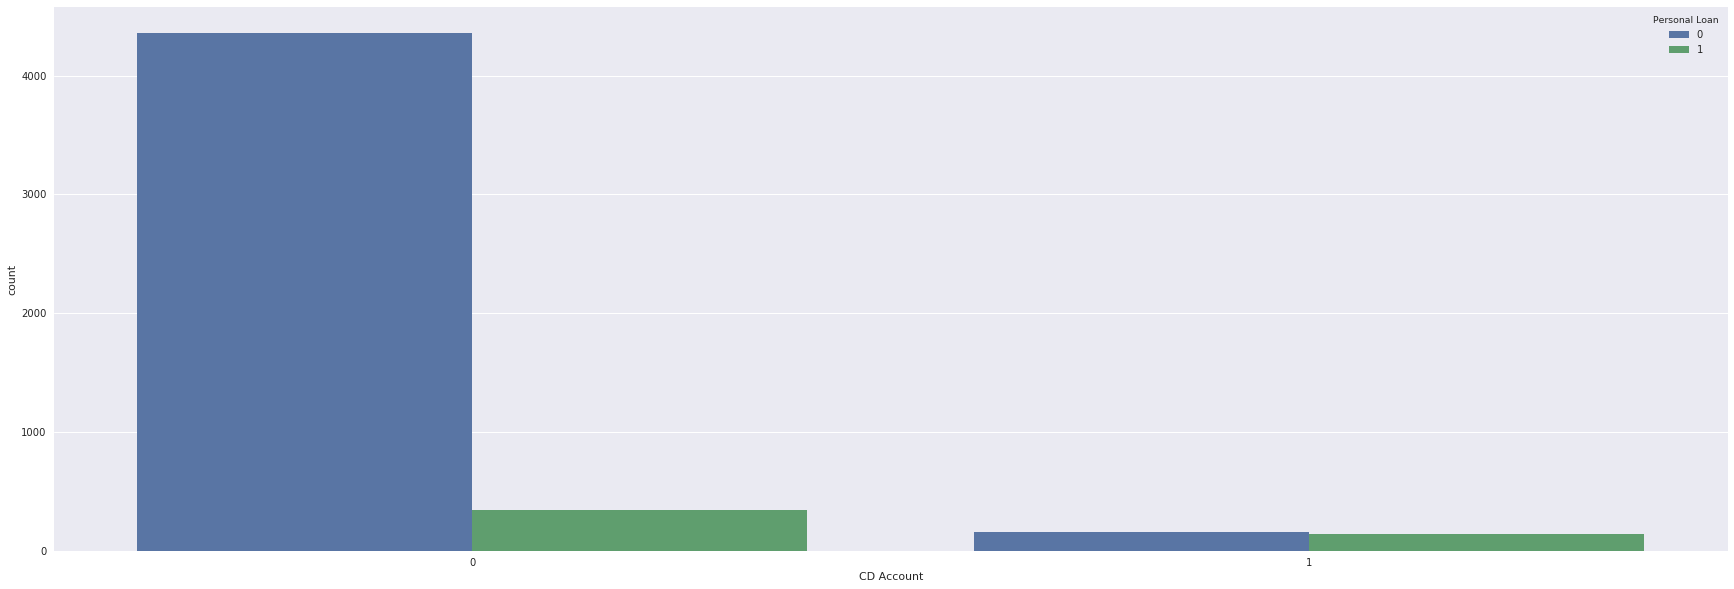

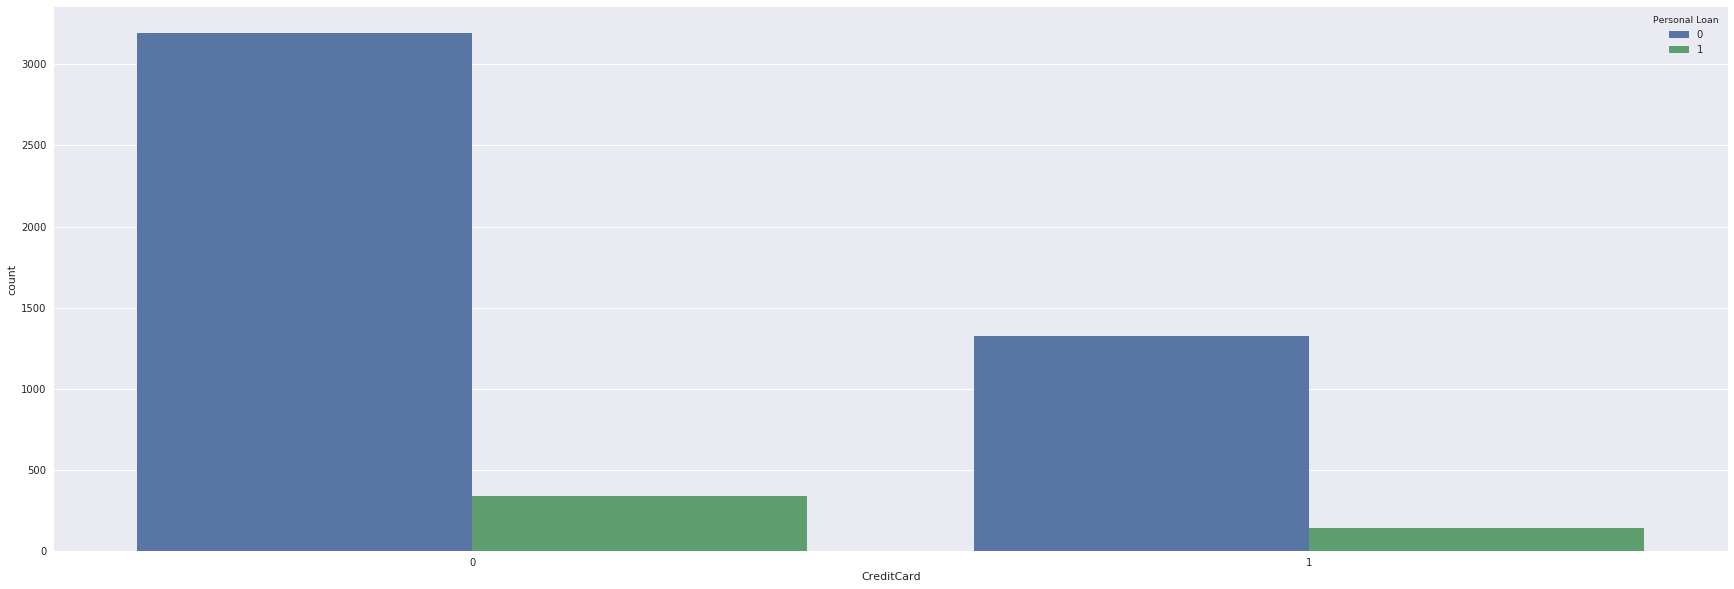

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['Securities Account'],hue=df['Personal Loan'])
plt.show()

plt.figure(figsize=(30,10))
sns.countplot(x=df['CD Account'],hue=df['Personal Loan'])
plt.show()

plt.figure(figsize=(30,10))
sns.countplot(x=df['CreditCard'],hue=df['Personal Loan'])
plt.show()

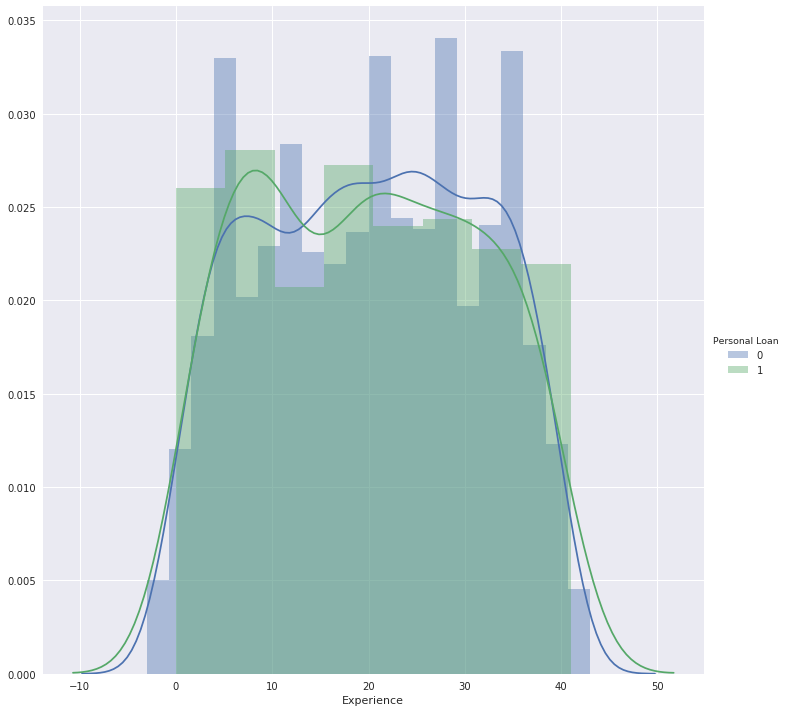

In [19]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Experience").add_legend()
plt.show()

#### Insights Experience:
No Major impact of experince is observed in approval of Personal Loan

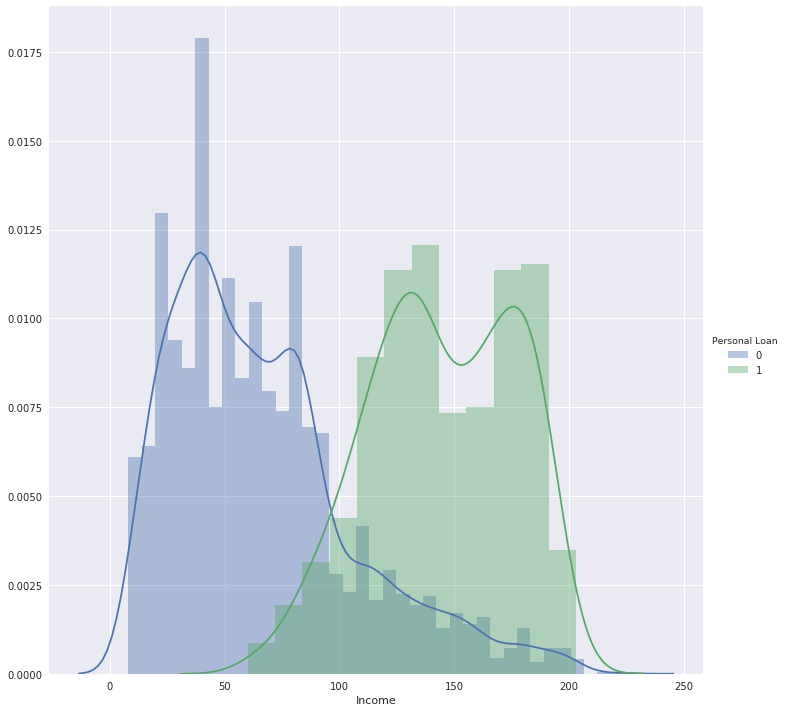

In [20]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Income").add_legend()
plt.show()

#### Insights:
Observing that higher chance of acceptance of personal loan if customer's salary is more than 90K.

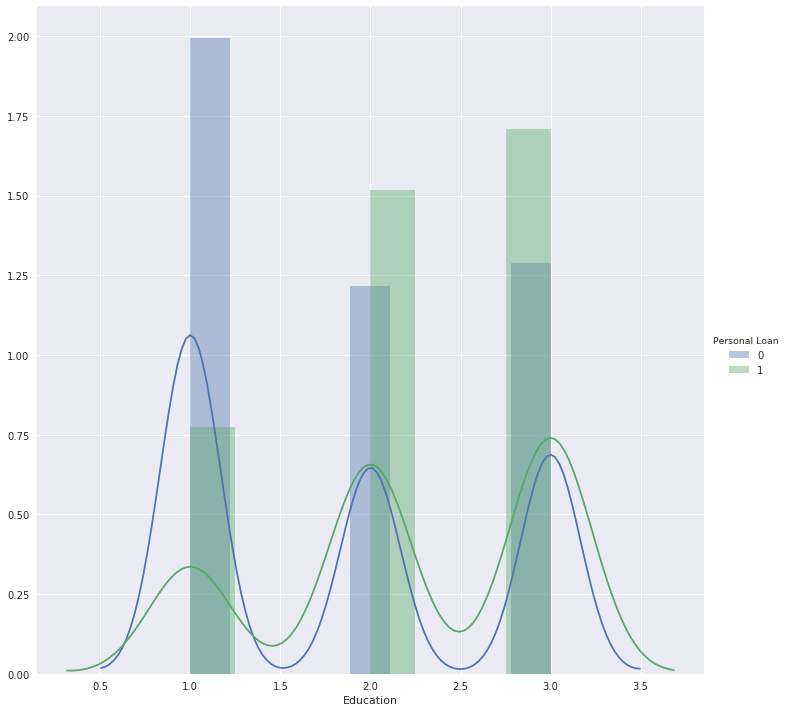

In [21]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Education").add_legend()
plt.show()

#### Insights:
The more the education, higher the chance of Personal loan acceptance

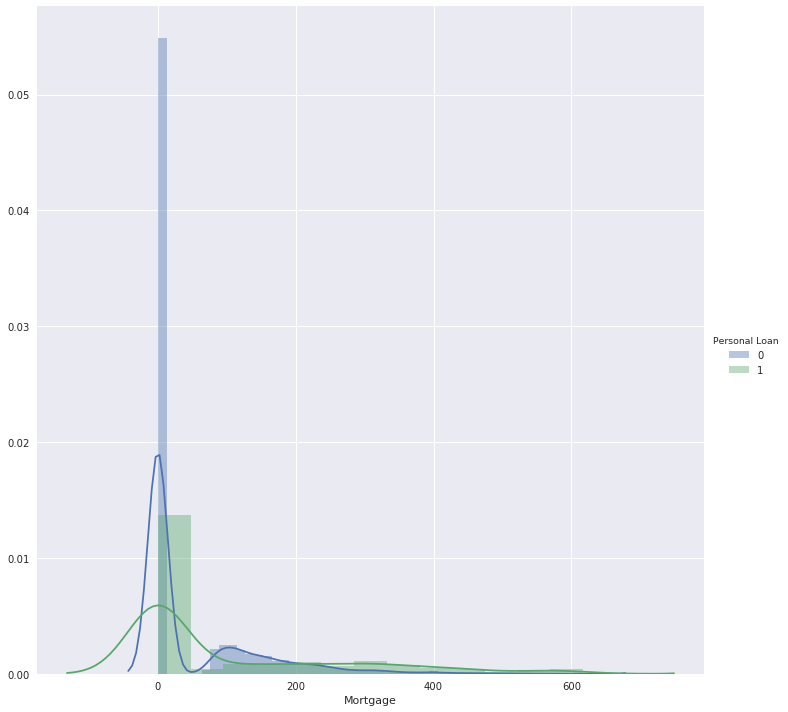

In [22]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Mortgage").add_legend()
plt.show()

#### Insights:
Higher value of house Mortgage corresponds to higher acceptance of Personal loan 

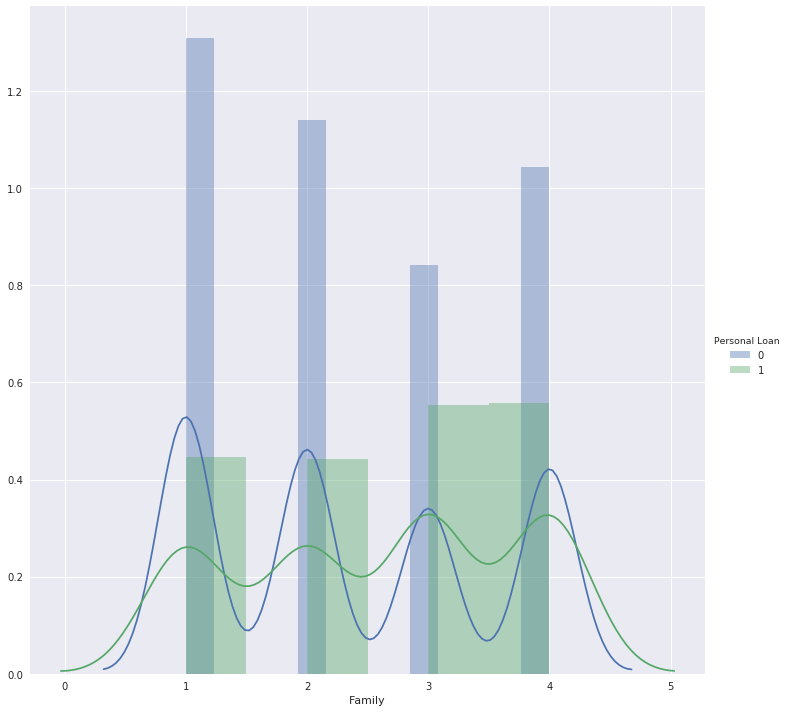

In [23]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Family").add_legend()
plt.show()

#### Insights:
No major changes observe but acceptance of Personal loan is more for family of 3 & 4 as compared to family of 1 & 2

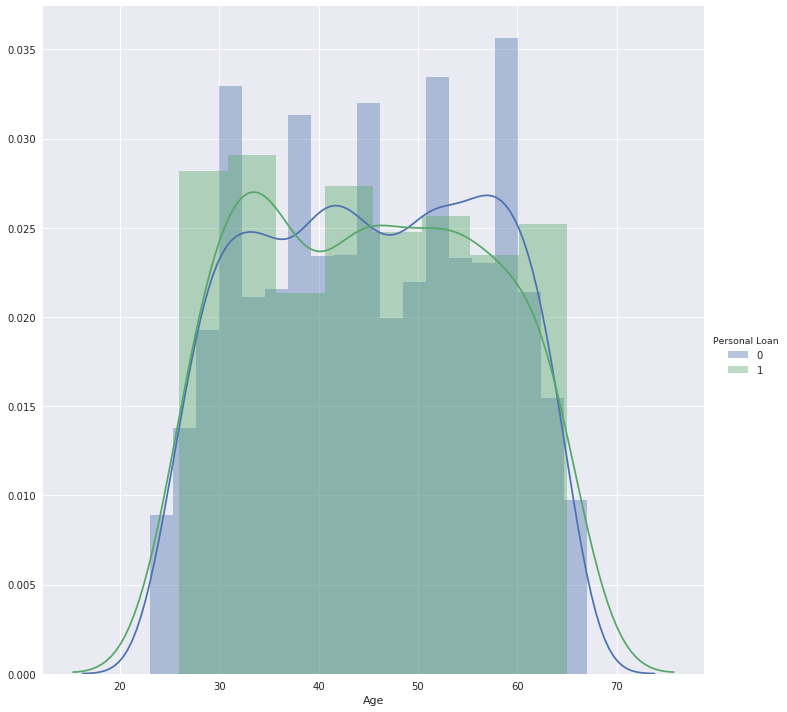

In [24]:
sns.FacetGrid(df,hue="Personal Loan",size =10).map(sns.distplot,"Age").add_legend()
plt.show()

###### Insights:
1. Highest acceptance of personal loan is of the customers having Age between 25 to 35. 
2. Chances of acceptance of personal loan dimishes if age reaches 65. 

<function matplotlib.pyplot.show>

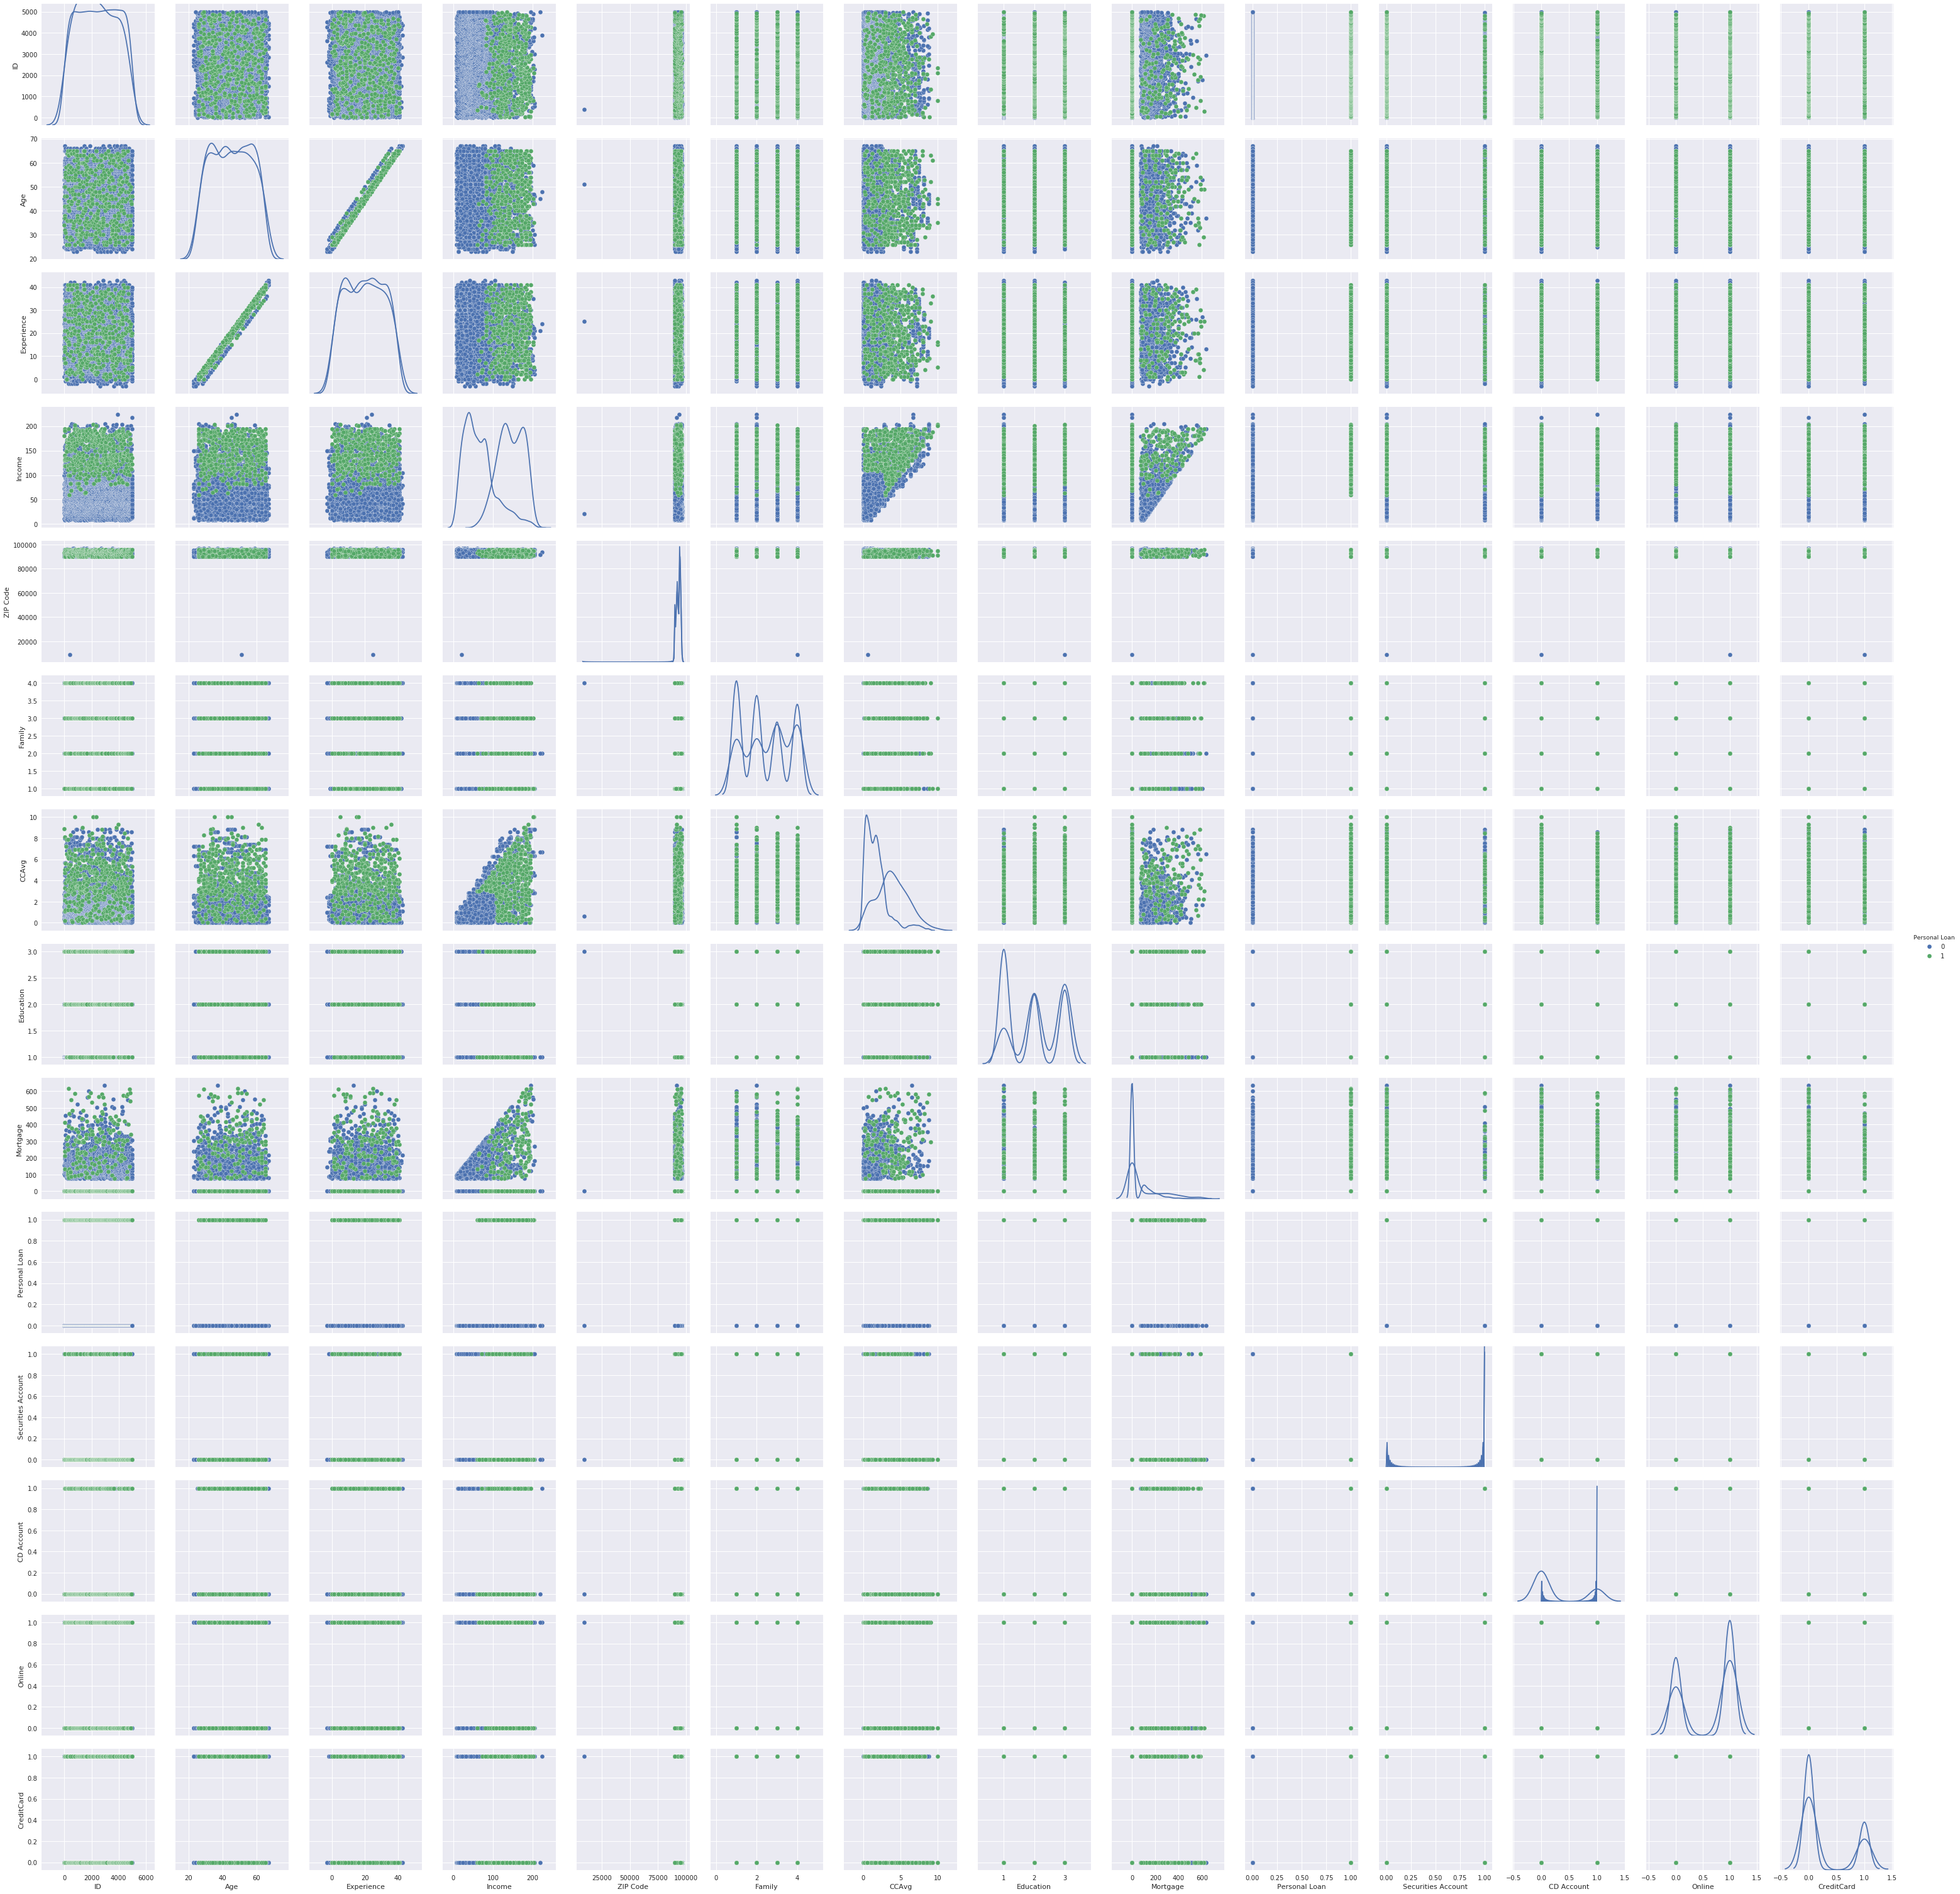

In [25]:
# sns.pairplot(df,hue = "Personal Loan", size = 3)
# plt.show

sns.pairplot(df,diag_kind = "kde",hue = "Personal Loan", size = 3)
plt.show

#### Identify Coorelation in data

In [26]:
def plot_corr(df, size=18):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

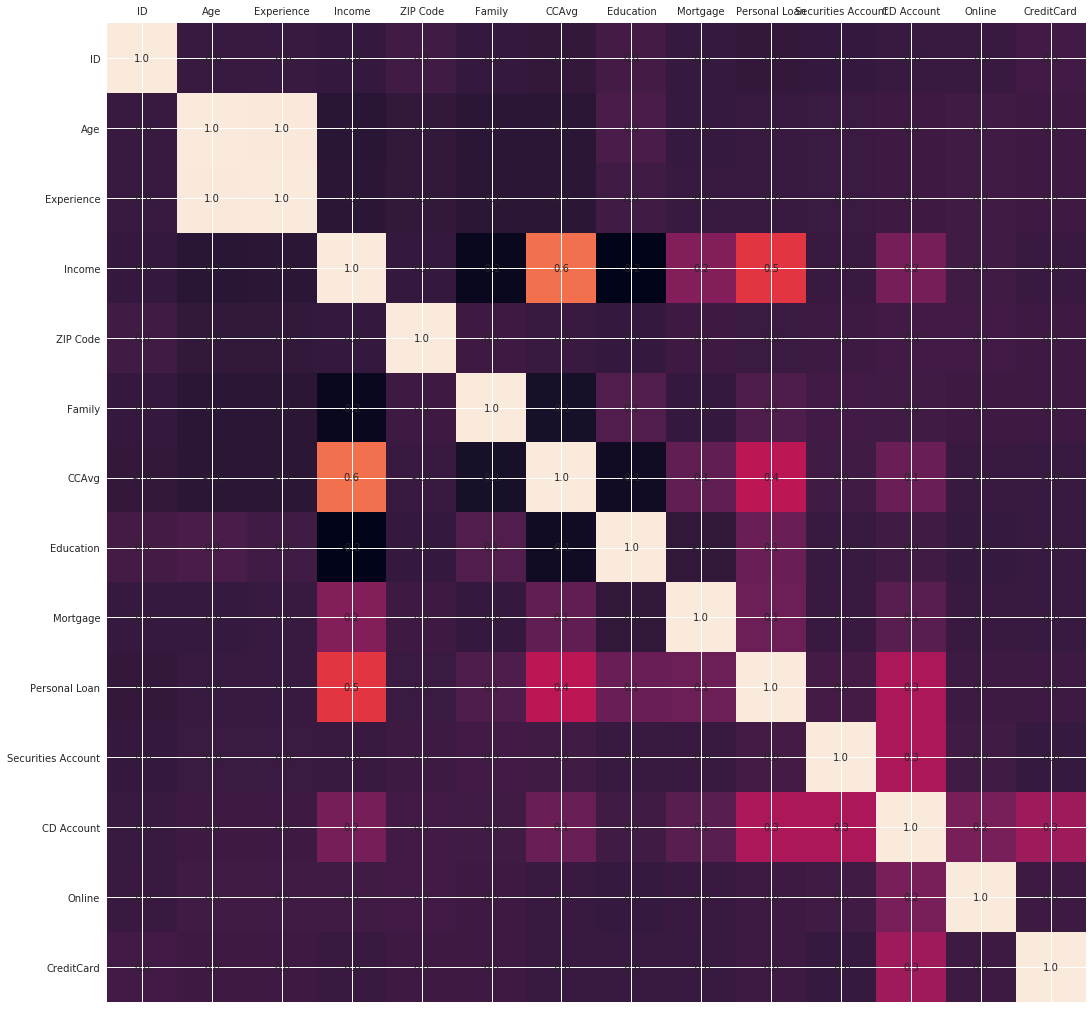

In [27]:
plot_corr(df)

### Get Data Model Ready

###### Converting Family & Education as Category

In [28]:
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')

In [29]:
# droping unique key column
cr_df = df.drop('ID', axis =1 )
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [30]:
#zip code has no association with Personal Loan so dropping this variable

cd_df = cr_df.drop('ZIP Code', axis =1 )
cd_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


###### Flooring negative values for column Experience as experience can't be negative

In [31]:
num = cd_df._get_numeric_data()
num[num < 0] = 0
cd_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## Split the data into training and test set in the ratio of 70:30 respectively

In [32]:
# independant variables
X = cd_df.drop(["Personal Loan"], axis=1)
# the dependent variable
Y = cd_df[["Personal Loan"]]
cd_df.shape


(5000, 12)

##### Creating Dummy Variables 

In [33]:
X = pd.get_dummies(X,columns = ['Education','Family'],drop_first = True)
X.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,1,0,0,0,0,0,0,0,1
1,45,19,34,1.5,0,1,0,0,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,0,1,0,0,0,0
4,35,8,45,1.0,0,0,0,0,1,1,0,0,0,1


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

y_test["Personal Loan"].value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

Validation of 70 - 30 distribution

In [35]:
x_train.shape

(3500, 14)

In [36]:
x_test.shape

(1500, 14)

##### Check loan acceptance ratio in split data


In [37]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(cd_df.loc[cd_df['Personal Loan'] == 1]), (len(cd_df.loc[cd_df['Personal Loan'] == 1])/len(cd_df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(cd_df.loc[cd_df['Personal Loan'] == 0]), (len(cd_df.loc[cd_df['Personal Loan'] == 0])/len(cd_df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 1]), (len(y_train[y_train['Personal Loan'] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 0]), (len(y_train[y_train['Personal Loan'] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 1]), (len(y_test[y_test['Personal Loan'] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 0]), (len(y_test[y_test['Personal Loan'] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (0.00%)
Original Personal Loan False Values   : 4520 (0.00%)

Training Personal Loan True Values    : 331 (0.00%)
Training Personal Loan False Values   : 3169 (0.00%)

Test Personal Loan True Values        : 149 (0.00%)
Test Personal Loan False Values       : 1351 (0.00%)



### Logistic regression and Chi Square testing to test the significance of columns on the dependent variables

In [38]:
import statsmodels.api as sm

In [39]:
logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.107508
         Iterations 10


In [40]:
from scipy import stats
stats.chisqprob = lambda chisq, cd_df: stats.chi2.sf(chisq, cd_df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3485
Method:                           MLE   Df Model:                           14
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.6565
Time:                        20:00:50   Log-Likelihood:                -376.28
converged:                       True   LL-Null:                       -1095.5
                                        LLR p-value:                8.933e-299
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.1804      2.228     -5.916      0.000     -17.547      -8.814
Age                   -0.0093      0.082     -0.114      0.910      -0.169       0.151
Experience          

##### Interpretation of Pseudo R^2
A pseudo R^2 of 65% indicates that 65% of the uncertainity of the intercept only model

In [41]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state =7)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Confusion matrix for train data
predict_train = logreg.predict(x_train)
cm_train = metrics.confusion_matrix(y_train,predict_train)
print('confusion_matrix = \n',cm_train)

('confusion_matrix = \n', array([[3136,   33],
       [ 106,  225]]))


In [43]:
# Confusion matrix for test data
predict_test = logreg.predict(x_test)
cm_test = metrics.confusion_matrix(y_test,predict_test)
print('confusion_matrix = \n',cm_test)

('confusion_matrix = \n', array([[1340,   11],
       [  60,   89]]))


In [44]:
#Calculate the odds ratio
lgcoef = pd.DataFrame(lg.params,columns = ['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

##### Filter by significant P- Value (pval <0.1) and sort descending by odds ratio

In [45]:
lgcoef = lgcoef.sort_values(by = "Odds_ratio",ascending = False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.27,71.73,0.99,0.00
Education_2,4.01,54.92,0.98,0.00
CD Account,3.71,40.79,0.98,0.00
Family_3,2.49,12.04,0.92,0.00
Family_4,1.64,5.16,0.84,0.00
CCAvg,0.25,1.28,0.56,0.00
Income,0.06,1.06,0.52,0.00
Online,-0.59,0.56,0.36,0.00
CreditCard,-1.00,0.37,0.27,0.00
Securities Account,-1.07,0.34,0.26,0.01


### Logistic Regression - Loop 2 once we understood the significance of Variables on underlying dependent variable
Now we understood that Mortgage, Experience and Age have very little to no Significance on dependent variable 

In [46]:
## Dropping the non significant variables where pvalue >.1
## Again split the data into training and test set in the ratio of 70:30 respectively 


# independant variables
X = cd_df.drop(["Personal Loan","Experience","Age","Mortgage"], axis=1)
# the dependent variable
Y = cd_df[["Personal Loan"]]
X.head()

,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,49,4,1.60,1,1,0,0,0
1,34,3,1.50,1,1,0,0,0
2,11,1,1.00,1,0,0,0,0
3,100,1,2.70,2,0,0,0,0
4,45,4,1.00,2,0,0,0,1


In [47]:
X = pd.get_dummies(X,columns = ['Education','Family'],drop_first = True)
X.head()

,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Family_2,Family_3,Family_4
0,49,1.60,1,0,0,0,0,0,0,0,1
1,34,1.50,1,0,0,0,0,0,0,1,0
2,11,1.00,0,0,0,0,0,0,0,0,0
3,100,2.70,0,0,0,0,1,0,0,0,0
4,45,1.00,0,0,0,1,1,0,0,0,1


In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

y_test["Personal Loan"].value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

In [49]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

     0    1     2    3     4     5    6    7     8    9   10  intercept
0 0.05 0.18 -0.83 2.94 -0.60 -0.88 2.56 2.74 -0.29 1.56 0.97      -9.43


In [50]:
#Scoring the Model
model_score = model.score(x_test, y_test)
model_score


0.9513333333333334

Training accuracy 0.9513333333333334

Testing accuracy 0.9605714285714285

Recall Score 0.5704697986577181

Precision Score 0.9042553191489362

F1 Score 0.6995884773662552

Roc AUC Score 0.7819040333036925



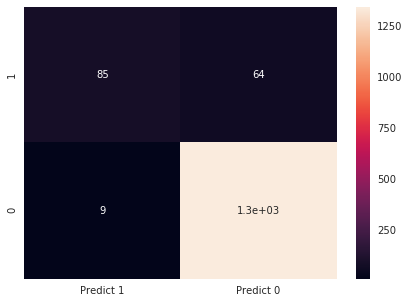

In [51]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print "Training accuracy",model_score

print("")
print "Testing accuracy",model.score(x_train,y_train)
print("")
print "Recall Score",recall_score(y_test, y_predict)
print("")
print "Precision Score",precision_score(y_test, y_predict)
print("")
print "F1 Score",f1_score(y_test, y_predict)
print("")
print"Roc AUC Score",roc_auc_score(y_test, y_predict)
print("")


The confusion matrix

True Positives (TP): we correctly predicted that customer accepted Personal loan 85

True Negatives (TN): we correctly predicted that customer accepted Personal loan 1342

False Positives (FP): we incorrectly predicted that customer accepted Personal loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that that customer didn't accept Personal loan (a "Type II error") 64 Falsely predict negative Type II error

### Hence 96% of accuracy

## Model Evaluation
Since we need to minimize the false positive as it is a banking problem and it's highly recommended that we minimize the future losses rather than getting more business, we will try to maximize the precision.

<function matplotlib.pyplot.show>

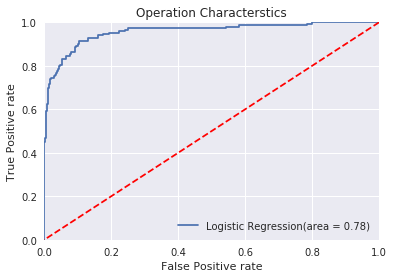

In [52]:
#ROC AUC Curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([1,0],[1,0],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Operation Characterstics')
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show

### Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not?

#### Changing Threshold

In [53]:
threshold = 0.70
preds = np.where(model.predict_proba(x_test)[:,1]>threshold,1,0)

Recall Score 0.44966442953020136
precision Score 0.9852941176470589
F1 Score 0.6175115207373272
Roc AUC Score 0.7244621185400824


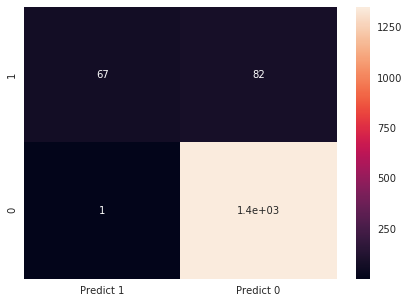

In [54]:
cm=metrics.confusion_matrix(y_test, preds, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print "Recall Score",recall_score(y_test, preds)

print "precision Score",precision_score(y_test, preds)

print "F1 Score",f1_score(y_test, preds)

print "Roc AUC Score",roc_auc_score(y_test, preds)


#### By considering threshold at 70%, we have achieved 98.5% precision

### Model Performance tuning by changing different parameters of logistic regression

In [55]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
# Running a loop to check different solver values
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state =41,penalty ='l2',C=.75,solver = i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test,y_test),3))
    
print(solver)

print(train_score)

print(test_score)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.961, 0.961, 0.959, 0.903, 0.905]
[0.951, 0.951, 0.952, 0.897, 0.9]


##### As we can see, by using Lib Linear solver, we are achieving greater accuracy as compared to other solvers.

In [57]:
# Running a loop to check different solver values

model = LogisticRegression(random_state =41,penalty ='l1',C=.75,solver = 'liblinear',class_weight = 'balanced')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
training_accuracy = model.score(x_train,y_train)
print(training_accuracy)
testing_accuracy = model.score(x_test,y_test)
print(testing_accuracy)

0.9142857142857143
0.914


In [58]:
#Running logistic regression for different values of C
train_score=[]
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state =41,penalty ='l1',C=i,solver = 'liblinear',class_weight = 'balanced')
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test,y_test),3))
    
print(C)
print(train_score)
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.849, 0.911, 0.914, 0.914, 0.914, 0.914]
[0.833, 0.909, 0.913, 0.913, 0.914, 0.914]


##### As we can see, we are achieving greater accuracy with value of Inverse regularization parameter as .75 to 1

## Therefore our final model is the first model with Liblinear solver that we created with a threshold of 70%

In [59]:
# Therefore final model is the first model that we created
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
threshold = 0.70
preds = np.where(model.predict_proba(x_test)[:,1]>threshold,1,0)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
#print(coef_df)
cdf = pd.DataFrame(dict(zip(X.columns,model.coef_[0])),index=['Coefficients']).T
print(cdf)

                    Coefficients
CCAvg                       0.18
CD Account                  2.94
CreditCard                 -0.88
Education_2                 2.56
Education_3                 2.74
Family_2                   -0.29
Family_3                    1.56
Family_4                    0.97
Income                      0.05
Online                     -0.60
Securities Account         -0.83


('Training accuracy', 0.9513333333333334)
('Testing accuracy', 0.9605714285714285)
('Recall Score', 0.44966442953020136)
('Precision Score', 0.9852941176470589)
('F1 Score', 0.6175115207373272)
('Roc AUC Score', 0.7244621185400824)


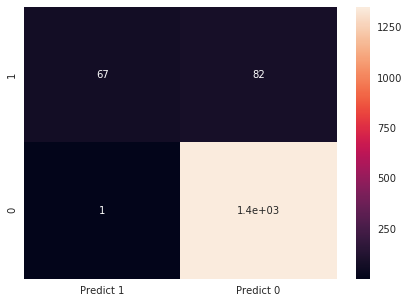

In [60]:
cm=metrics.confusion_matrix(y_test, preds, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print("Training accuracy",model_score)

print("Testing accuracy",model.score(x_train,y_train))

print("Recall Score",recall_score(y_test, preds))
print("Precision Score",precision_score(y_test, preds))
print("F1 Score",f1_score(y_test, preds))
print("Roc AUC Score",roc_auc_score(y_test, preds))

### Business understanding of the Logistic Model
While building our Bank Loan Campaign model, our observations are as follow:
1. We are 96% confident on our model predicted values
2. Following are the key factors plays importnt role for conversion:
    a. Income
    b. Family
    c. CCAvg
    d. Education
    e. Securities Account
    f. CD Account
    g. Online
    h. CreditCard